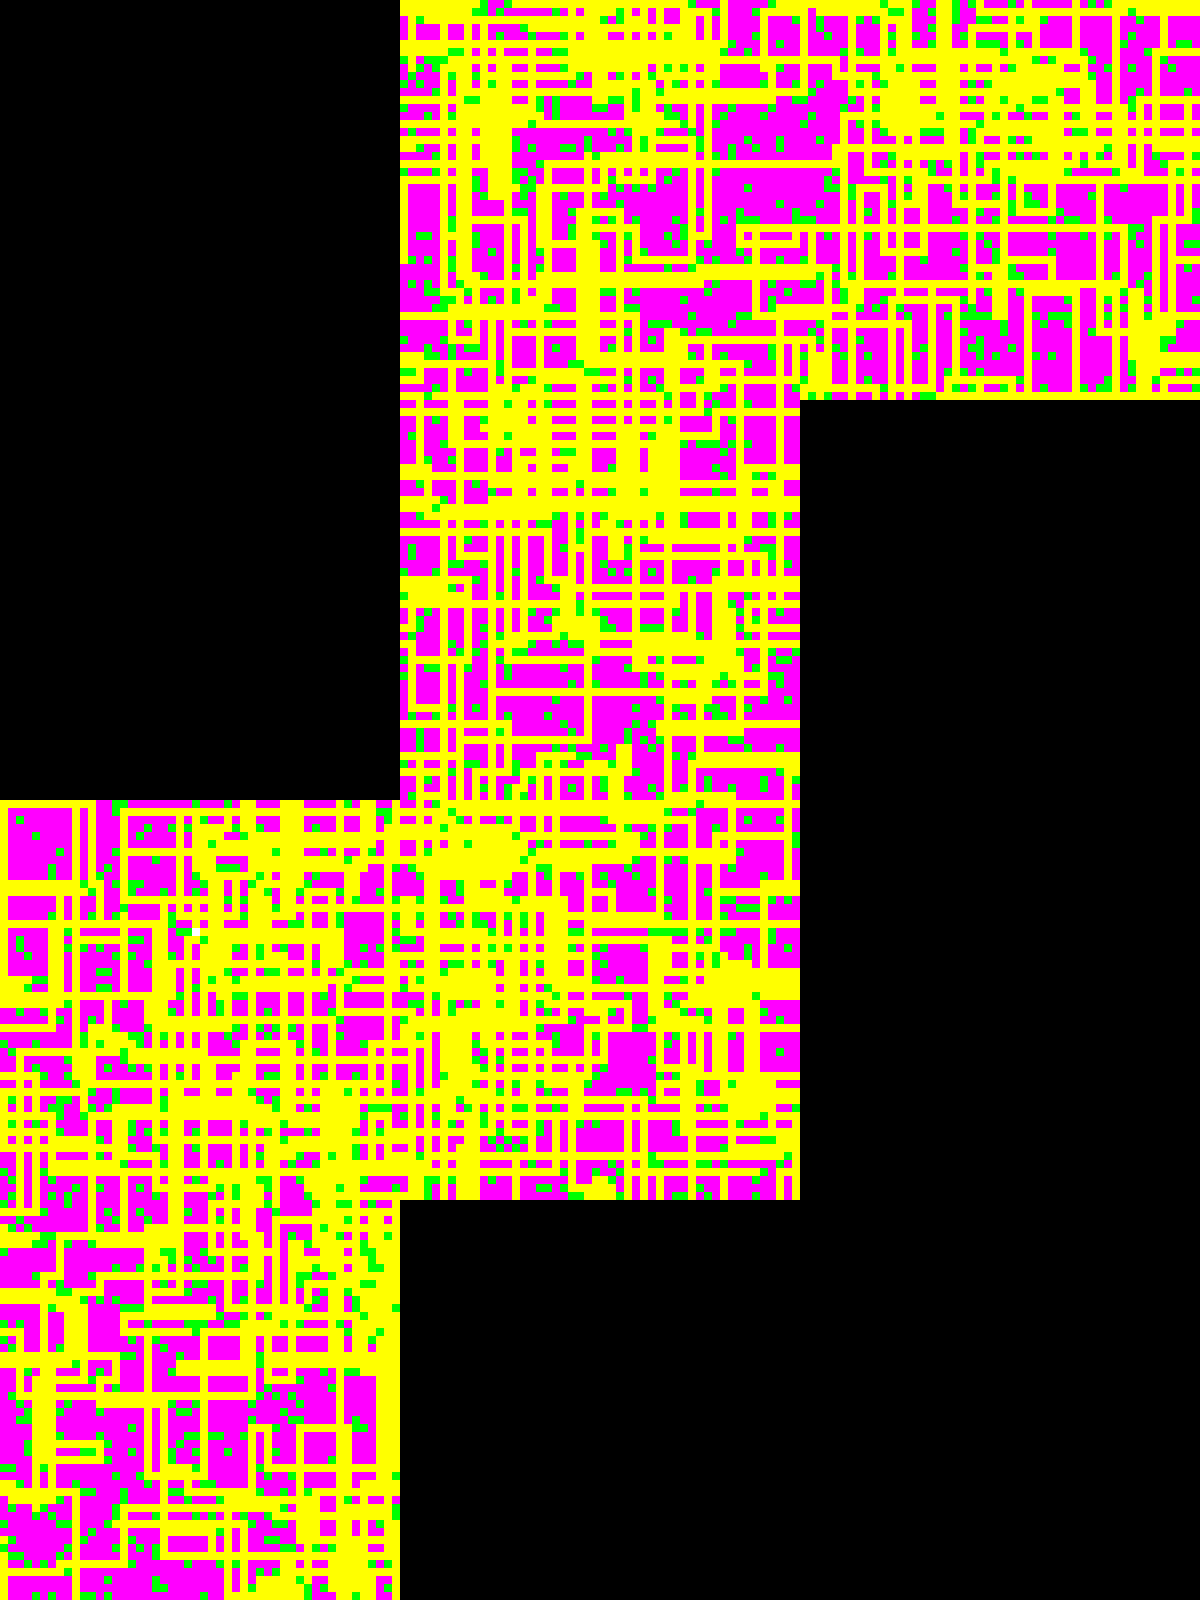

part1: 117102 117102


In [1]:
import cv2
import re
import numpy as np
from PIL import Image
from IPython import display


def ld():
    a,b=open('22.txt').read().split('\n\n')
    M={}
    xx=yy=None
    for y,l in enumerate(a.split('\n')):
        for x,v in enumerate(l):
            if xx is None and v=='.':
                xx=x
                yy=y
            e={}
            e[' ']=None
            e['.']=0
            e['#']=1
            vv=e[v]
            if not vv is None:
                M[(x,y)]=vv
            
        
    return M,b,xx,yy

def dims(M):
    X=[]
    Y=[]
    for x,y in M.keys():
        X.append(x)
        Y.append(y)
        
        
    return max(X)+1,max(Y)+1
def pretty(M,pth):
    C=[[255,0,255],[0,255,0]]
    w,h=dims(M)
    pix=np.zeros([h,w,3],np.uint8)
    for p in M.keys():
        x,y=p
        pix[y,x,:]=C[M[p]]
    for x,y in pth:
        pix[y,x,:]=[255,255,0]
    x,y=pth[-1]
    pix[y,x,:]=[255,255,255]
    
    F=8
    pix = cv2.resize(pix, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    
    display.clear_output(wait=True)
    
    display.display(Image.fromarray(pix, 'RGB'))

def p(prt):
    dirs="rdlu"
    D=[[1,0],[0,1],[-1,0],[0,-1]]
    M,p,x,y=ld()
    #print(p)
    
    heading=0
    w,h=dims(M)
    ix=0
    pth=[(x,y)]
    for d in re.split('L|R',p):
        #print("---",d)
        ix+=len(d)
        
        for z in range(int(d)):
            dx,dy=D[heading]
            
            xx=x+dx
            yy=y+dy
            if prt==1:
                while not (xx,yy) in M:
                    xx=(xx+dx)%w
                    yy=(yy+dy)%h
            else:
                
                if not (xx,yy) in M:
                    pass
            
            if M[(xx,yy)]==0:
                x=xx
                y=yy
                pth.append((x,y))
        
        if ix <len(p):
            if p[ix]=='L':
                heading=(heading-1)%4
            elif p[ix]=='R':
                heading=(heading+1)%4
            else:
                print(p[ix])
                assert(0)
        ix+=1
    pretty(M,pth)
    return 1000*(y+1)+4*(x+1)+heading

print('part1:',p(1),117102)



    

In [2]:
print('part2:',p(2),0)


KeyError: (59, -1)